# k-최근접 이웃 회귀의 문제점

k-최근접 이웃 회귀는 결국 제일 가까운 데이터를 활용하여 평균을 내는 것이기에 가지고 있는 데이터의 범위를 넘어가게 되면 무조건 같은 값을 가질 수밖에 없다.

In [1]:
import numpy as np

In [2]:
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [3]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42
)

train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [4]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=3)

knr.fit(train_input, train_target)
print(knr.predict([[50]]))

[1033.33333333]


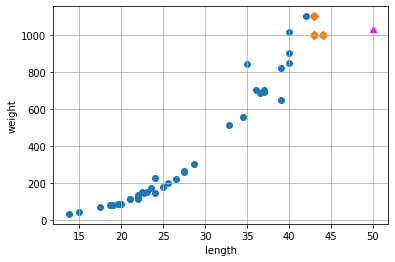

In [5]:
import matplotlib.pyplot as plt

distances, indexes = knr.kneighbors([[50]])

plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
plt.scatter(50, 1033, marker='^', color='magenta')                                 # 주황색 마커 정보의 평균을 50cm짜리 농어에 적용시켜 500g이라는 오차가 발생했다.
plt.grid()                                                                         # 이러한 예측값은 길이가 50이 넘어가는 상황(아래)에서도 같은 값을 예측할 수밖에 없다.
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [6]:
print(knr.predict([[100]]))

[1033.33333333]


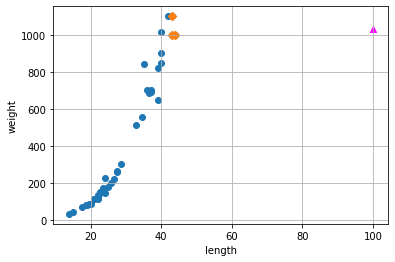

In [7]:
distances, indexes = knr.kneighbors([[100]])

plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
plt.scatter(100, 1033, marker='^', color='magenta')
plt.grid()
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# 선형 회귀(linear regression) - LinearRegression(추정기: estimator) 사용

coef_ : $y = ax + b$에서 기울기($a$)

intererpt_ : $y = ax + b$에서 $y$절편($b$)

위와 같은 최근접 이웃 회귀의 문제점을 해결하기 위한 방법이 선형 회귀이다.

선형 회귀는 주어진 데이터를 바탕으로 가장 근접한 선형 데이터를 분석해 예측하는 것이다.

In [8]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()                                                            # 객체화를 실행한다.

lr.fit(train_input, train_target)                                                  # 객체화를 실행했으므로 주어진 특성을 가지고 훈련을 시작한다.

print(lr.predict([[50]]))                                                          # 이전보다 오차가 줄어듦을 확인할 수 있다.

[1241.83860323]


In [9]:
print(lr.coef_, lr.intercept_)                                                      # 기울기와 y절편

[39.01714496] -709.0186449535477


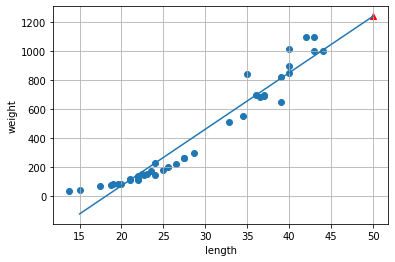

In [10]:
plt.scatter(train_input, train_target)

plt.plot([15, 50], [15 * lr.coef_ + lr.intercept_, 50 * lr.coef_ + lr.intercept_])     # 15에서 50까지(x축 정보) 직선을 그린다.
                                                                                    # 여기에 x = 15 일 때, 값과 x = 50 일 때의 값을 넣는다.(직선일 경우)
plt.scatter(50, 1241.8, marker='^', color='red')
plt.grid()
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [11]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.939846333997604
0.8247503123313558


선형 회귀 그래프를 보면 길이가 짧은 농어의 무게가 0 이하로 내려갈 수 있다는 문제점이 발생한다.

이러한 문제점을 해결하기 위한 방법이 **다항 회귀(polynomial regression)** 이다.
즉, **제곱**을 이용하여 0 이하의 값을 제거하는 방법이다.

# 다항 회귀(polynomial regression)

$y = ax^2 + bx + c$

최적의 직선이 아닌 곡선을 찾는다면 0 이하의 값을 제거할 수 있다. 즉, 다항 회귀는 input된 데이터를 제곱한 것이다.

In [12]:
train_poly = np.column_stack((train_input ** 2, train_input))                      # input을 제곱한 것과 그냥 input 두 배열을 나란히 붙인다.
test_poly = np.column_stack((test_input ** 2, test_input))                              # 주의 : np.column_stack(()) ()를 두 번 사용해야한다.

print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [13]:
lr = LinearRegression()

lr.fit(train_poly, train_target)                                                   # 제곱으로 만들어준 훈련 세트를 가지고 다시 훈련을 시작한다.

print(lr.predict([[50**2, 50]]))                                                   # 이렇게하면 50cm의 농어의 무게 예측값이 더욱 정확해짐을 확인할 수 있다.

[1573.98423528]


In [14]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:

print(lr.coef_, lr.intercept_)                                                      # y = ax^2 + bx + c 에서 a, b, c를 출력한 것이다.

[  1.01433211 -21.55792498] 116.0502107827827


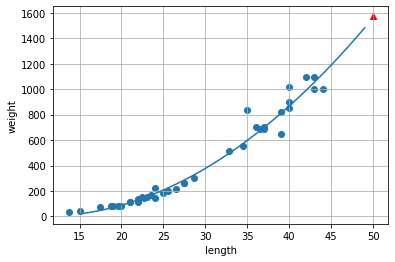

In [16]:
point = np.arange(15, 50)                                                          # 15에서 49까지의 범위를 설정한다.

plt.scatter(train_input, train_target)
plt.plot(point, 1.01 * point ** 2 - 21.6 * point + 116.05)                         # x축의 범위를 15에서 49까지로 설정한 후, 15 일 때, 공식에 대입, 16 일 때, 대입, 17 일 때, ... 으로 그래프를 그린다.

plt.scatter(50, 1574, marker='^', color='red')
plt.grid()
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

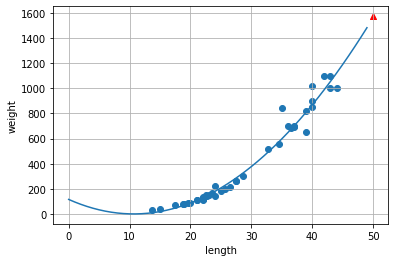

In [17]:
point = np.arange(0, 50)                                                          # 15에서 49까지의 범위를 설정한다.

plt.scatter(train_input, train_target)
plt.plot(point, 1.01 * point ** 2 - 21.6 * point + 116.05)                         # x축의 범위를 15에서 49까지로 설정한 후, 15 일 때, 공식에 대입, 16 일 때, 대입, 17 일 때, ... 으로 그래프를 그린다.

plt.scatter(50, 1574, marker='^', color='red')
plt.grid()
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [18]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9706807451768623
0.9775935108325122


과소적합 상태로 더욱 복잡한 모델이 필요함.